In [1]:
using JSON

In [2]:
norObjFunDict = readall("./results/norObjFunDict.json");
norObjFunDict = JSON.parse(norObjFunDict);

demandsDiffDict = readall("./results/demandsDiffDict.json");
demandsDiffDict = JSON.parse(demandsDiffDict);

objInvVIDict = readall("./results/objInvVIDict.json");
objInvVIDict = JSON.parse(objInvVIDict);

coeffs_dict = readall("./results/coeffs_dict.json");
coeffs_dict = JSON.parse(coeffs_dict);

tapFlowVecDict = readall("./results/tapFlowVecDict.json");
tapFlowVecDict = JSON.parse(tapFlowVecDict);

link_capac_dict = readall("../temp_files/link_capac_dict_Anaheim.json");
link_capac_dict = JSON.parse(link_capac_dict);

In [3]:
link_capac_vec = [link_capac_dict["$i"] for i=0:length(link_capac_dict)-1];

In [4]:
epsilon_2 = 1e-20

numIter = Int64[]

for l = 1:length(norObjFunDict)
    if norObjFunDict["$l"] - norObjFunDict["$(l+1)"] < epsilon_2
        push!(numIter, l)
        break
    end
end

In [5]:
# update plots based on convergence rate
N = numIter[1];

In [6]:
max_scaled_flow = maximum([tapFlowVecDict["$N"][i] / link_capac_vec[i] for i = 1:length(link_capac_vec)])

1.8373570280585805

INFO: Loading help data...


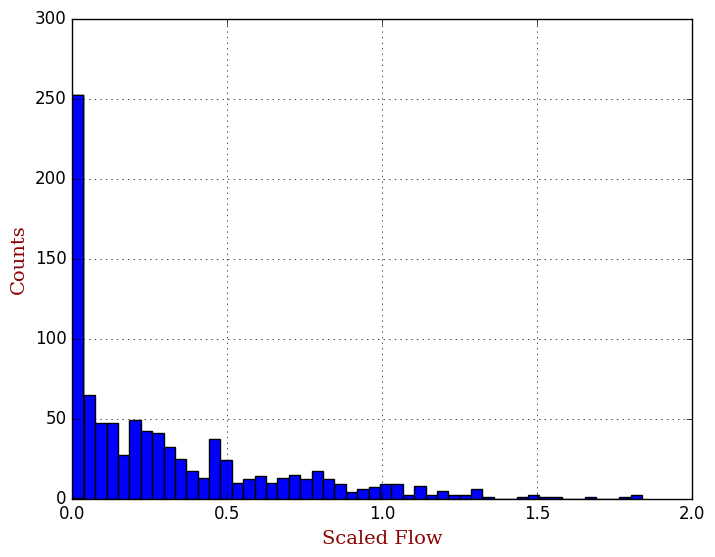

In [7]:
using PyPlot

#################
#  Create Data  #
#################
x = [tapFlowVecDict["$N"][i] / link_capac_vec[i] for i = 1:length(link_capac_vec)] # Values
nbins = 50 # Number of bins

##########
#  Plot  #
##########
# fig = figure("pyplot_histogram",figsize=(6,3)) # Not strictly required
ax = axes() # Not strictly required
h = plt[:hist](x,nbins) # Histogram

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]

grid("on")
xlabel("Scaled Flow", fontdict=font1)
ylabel("Counts", fontdict=font1)

savefig("./results/scaled_flow_histogram_Anaheim.pdf")

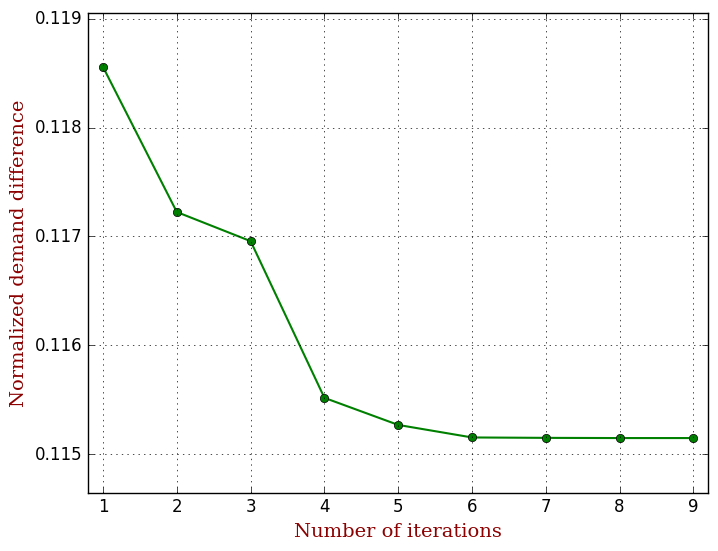

In [8]:
iterNum = 1:(N+1)

demandsDiff = map(iterNum->demandsDiffDict["$iterNum"], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, demandsDiff, "o-g", linewidth=1.5)

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, N + 1 + .2)
ylim(minimum(demandsDiff)-.0005, maximum(demandsDiff)+.0005)

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized demand difference", fontdict=font1)

savefig("./results/demandsDiff_biLev_Anaheim.pdf")

In [9]:
normObjInvVIDict = Dict{}()

for key in keys(objInvVIDict)
    normObjInvVIDict[key] = objInvVIDict[key] / objInvVIDict["1"]
end

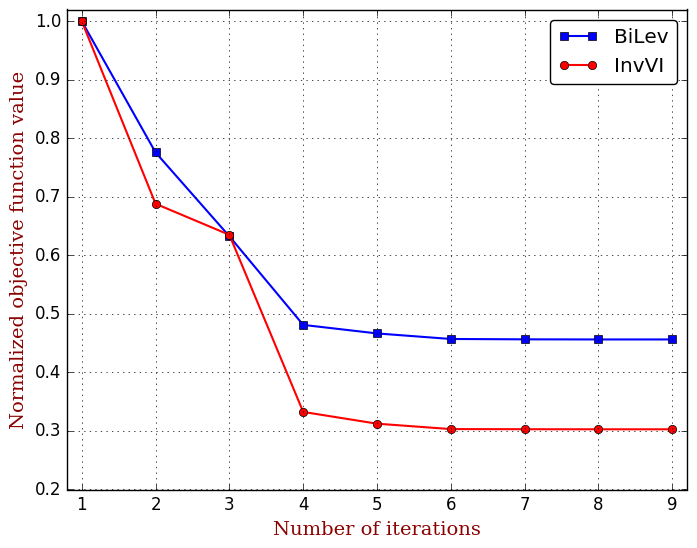

In [10]:
iterNum = 1:(N+1)

objFunBiLev = map(iterNum->norObjFunDict["$iterNum"], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, objFunBiLev, "s-b", label="BiLev", linewidth=1.5)

objFunInv = map(iterNum->normObjInvVIDict["$iterNum"], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, objFunInv, "o-r", label="InvVI", linewidth=1.5)

legend(loc="upper right",fancybox="true") 

grid("on")

xlim(0.8, N + 1 + .2)
ylim(0.2, 1.02)

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized objective function value", fontdict=font1)

savefig("./results/objFun_Anaheim.pdf")

In [11]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)]);

In [12]:
keys(coeffs_dict)

KeyIterator for a Dict{UTF8String,Any} with 9 entries. Keys:
  "(6,3.41,1.0,4)"
  "(6,3.41,1.0,2)"
  "(6,3.41,1.0,6)"
  "(6,3.41,1.0,5)"
  "(6,3.41,1.0,7)"
  "(6,3.41,1.0,3)"
  "(6,3.41,1.0,9)"
  "(6,3.41,1.0,8)"
  "(6,3.41,1.0,1)"

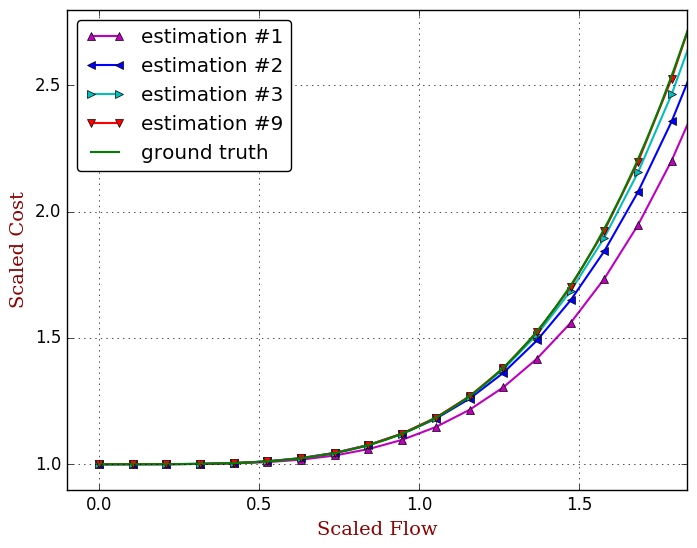

In [13]:
iterN_1 = 1
iterN_2 = 2
iterN_3 = 3
iterN_4 = N+1

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs_1 = coeffs_dict["(6,3.41,1.0,$iterN_1)"]
est_coeffs_2 = coeffs_dict["(6,3.41,1.0,$iterN_2)"]
est_coeffs_3 = coeffs_dict["(6,3.41,1.0,$iterN_3)"]
est_coeffs_4 = coeffs_dict["(6,3.41,1.0,$iterN_4)"]

xs = linspace(0, 2, 20)
xs_true = linspace(0, 2, 50)

zs_true = map(x->polyEval(true_coeffs, x), xs_true)

zs_1 = map(x->polyEval(est_coeffs_1, x), xs)
zs_2 = map(x->polyEval(est_coeffs_2, x), xs)
zs_3 = map(x->polyEval(est_coeffs_3, x), xs)
zs_4 = map(x->polyEval(est_coeffs_4, x), xs)

plot(xs, zs_1, "^-m", label="estimation #1", linewidth=1.5)
plot(xs, zs_2, "<-b", label="estimation #2", linewidth=1.5)
plot(xs, zs_3, ">-c", label="estimation #3", linewidth=1.5)
plot(xs, zs_4, "v-r", label="estimation #$(N+1)", linewidth=1.5)

plot(xs_true, zs_true, "-g", label="ground truth", linewidth=1.5)

legend(loc="upper left",fancybox="true") 

grid("on")
xlim(-0.1, max_scaled_flow);
ylim(0.9, 2.8);

font1 = ["family"=>"serif","color"=>"darkred","weight"=>"normal","size"=>14]

xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Anaheim.pdf")